In [1]:
import keras
import tensorflow
from keras.engine.saving import load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, MaxPooling2D, concatenate, AveragePooling2D
from keras import models
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from keras import regularizers
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score


Using TensorFlow backend.


In [2]:
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,SeparableConv2D,BatchNormalization, Activation, Dense
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam
import sys
import warnings

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import glob
import cv2
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import applications
from keras import backend as K
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import random

from matplotlib import pyplot as plt

In [4]:

mura_Dir = "MURA-v1.1/"
train_imgs_path=pd.read_csv(mura_Dir+'train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv(mura_Dir+'train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv(mura_Dir+'valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv(mura_Dir+'valid_labeled_studies.csv',names=["Test Labeled Studies","label"])

In [5]:
train_imgs_path=train_imgs_path.sort_values(by=['Train Dataset'])
train_labels=train_labels.sort_values(by=['Train Labeled Studies'])
test_imgs_path=test_imgs_path.sort_values(by=['Test Dataset'])
test_labels=test_labels.sort_values(by=['Test Labeled Studies'])

In [6]:
test_labels['Body Part']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study Type']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])
test_labels['p']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[3])[:20])


In [7]:
train_labels['Body Part']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study Type']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])
train_labels['p']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[3])[:20])


# $~Statistics Of Data$ 
Bar Plots For Mura variants between its count between classes and Body Parts , the Body parts , Studies of Patients and their  Classes


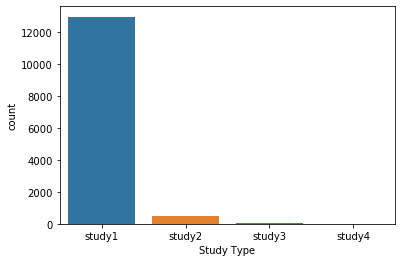

In [8]:
sns.countplot(data=train_labels,x='Study Type')

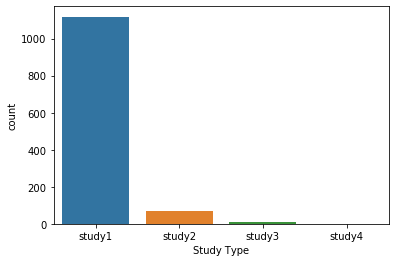

In [9]:
sns.countplot(data=test_labels,x='Study Type')

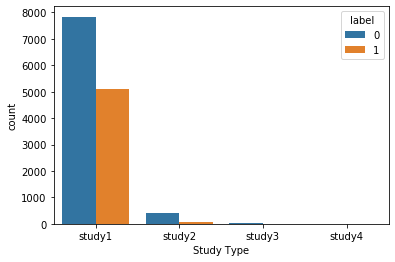

In [10]:
sns.countplot(data=train_labels,x='Study Type',hue='label')

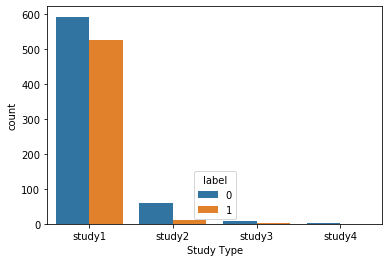

In [11]:
sns.countplot(data=test_labels,x='Study Type',hue='label')

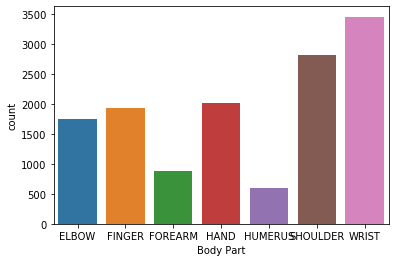

In [12]:
sns.countplot(data=train_labels,x='Body Part')

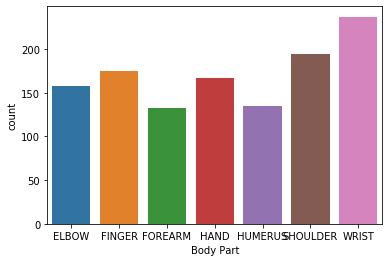

In [13]:
sns.countplot(data=test_labels,x='Body Part')

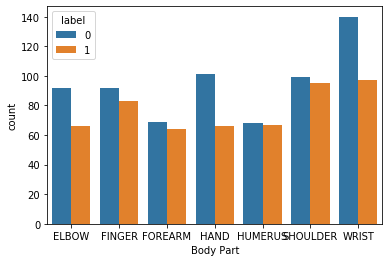

In [14]:
import seaborn as sns
sns.countplot(data=test_labels,x='Body Part',hue='label')

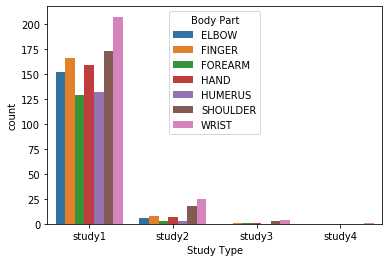

In [15]:
sns.countplot(data=test_labels,x='Study Type',hue='Body Part')

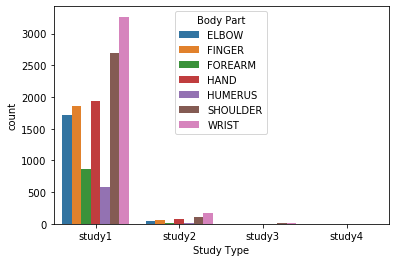

In [16]:
sns.countplot(data=train_labels,x='Study Type',hue='Body Part')

In [17]:
def fileImagesOfStudy(path):
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(img)
           
    return data

In [18]:
import matplotlib.pyplot as plt


In [19]:
def stretching_Data(files_,dim):
    stretch=[]
    for e in range(0,len(files_)):
        f=files_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            stretch.append(cv2.resize(dd[n],dsize=dim))
               
    return stretch

In [20]:
def stretching_Labels(labels_):
    labels=[]
    for e in range(0,len(labels_)):
        l=labels_.iloc[e]['label']
        f=labels_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            labels.append(l)
    return labels

In [21]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.grid(False)

        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)

    plt.show()

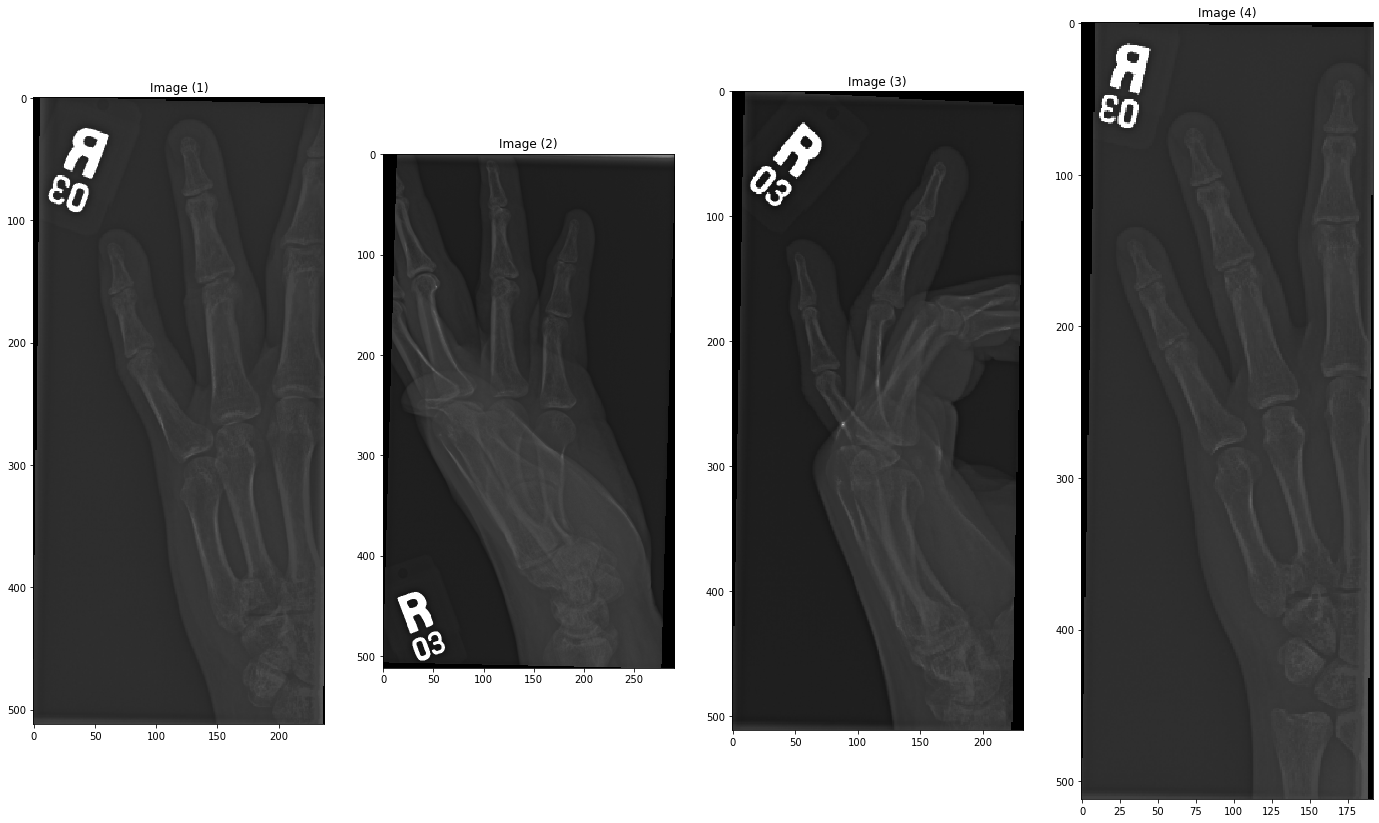

In [22]:

l=train_labels.iloc[2054]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

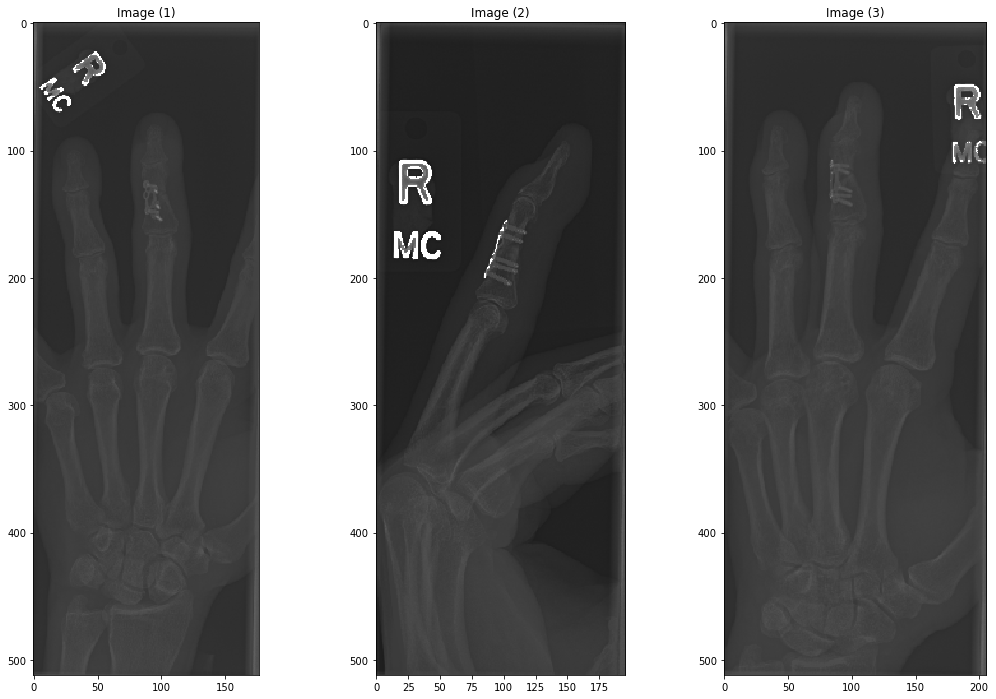

In [23]:
l=train_labels.iloc[2093]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

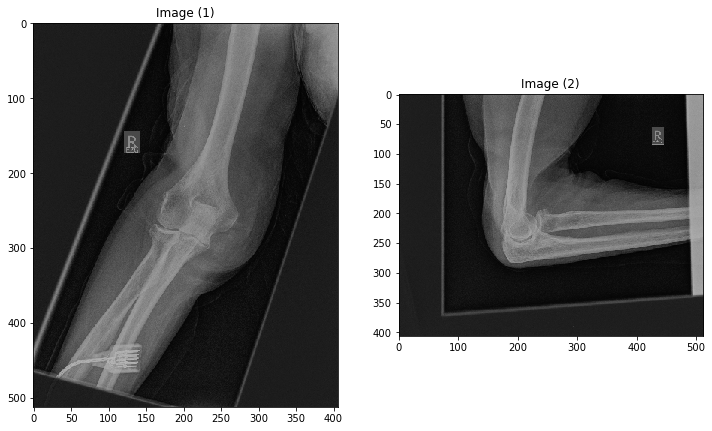

In [24]:
l=train_labels.iloc[3]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

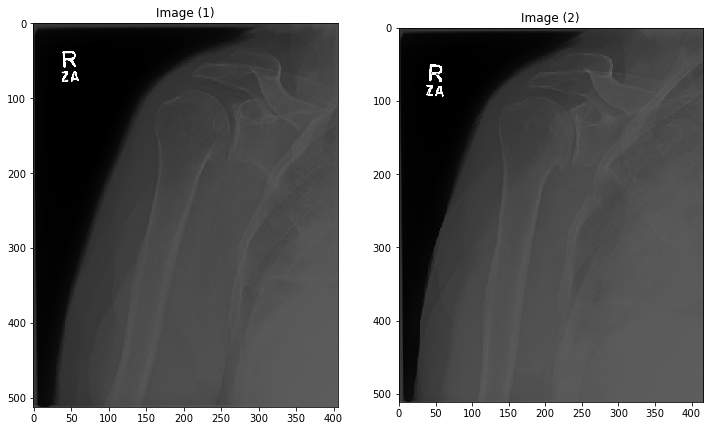

In [25]:
l=train_labels.iloc[7899]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
%matplotlib inline
plt.style.use("seaborn")


In [27]:
def plotingModel(history_):

    plt.plot(history_.history['loss'])
    plt.plot(history_.history['val_loss'])
    plt.title("Train vs Validation Loss")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.grid(False)

    plt.legend(['train', 'test'], loc='upper right')

In [28]:
def kappaC(tn,fp,fn,tp):
    total_n=tn+fp+fn+tp
    P_totalAgree=(tn+tp)/total_n
    acctual_no=tn+fp
    acctual_yes=fn+tp
    predicted_no=tn+fn
    predicted_yes=fp+tp
    P__no=(acctual_no/total_n)*(predicted_no/total_n)    
    P__yes=(acctual_yes/total_n)*(predicted_yes/total_n)
    Pchance=P__no+P__yes
    theKappa=(P_totalAgree-Pchance)/(1-Pchance)
    return theKappa

In [29]:
def plotResults(data__Test,labels_Test,_model):
    test_loss, test_acc = _model.evaluate(data__Test, labels_Test, batch_size=100)
    print("Loss on test set: ", test_loss)
    print("Accuracy on test set: ", test_acc)
    test_logits = _model.predict(data__Test, batch_size=10)
    cm  = confusion_matrix(labels_Test, np.round(test_logits))
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Normal', 'Abnromal'], fontsize=16)
    plt.yticks(range(2), ['Normal', 'Abnormal'], fontsize=16)
    plt.show()
    true_negative, false_positive, false_negative, true_positive  = cm.ravel()
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1=2*((precision*recall)/(precision+recall))
    kappa=kappaC(true_negative, false_positive, false_negative, true_positive)
    
    print('Precison of MURA for Abnormal:{:.2f}'.format(precision))
    print('Recall of MURA for Abnormal:{:.2f}'.format(recall))
    print('Fmeasure of MURA for Abnormal:{:.2f}'.format(f1))
    print('Kappa of MURA for Abnormal:{:.2f}'.format(kappa))
    num_test = 20
    predictions = _model.predict(data__Test[:num_test,:,:,:])
    for i in range(num_test):
        if predictions[i] <test_acc:
            print("Predicted: Abnormal ",predictions[i])
        else:
            print("predicted: Normal",predictions[i])
        plt.imshow(data__Test[i])
        plt.grid(False)

        plt.show()
    return test_acc,kappa
   

In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
import glob
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.preprocessing import image

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import os
import glob
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.preprocessing import image

$Inception Model$

In [32]:
def load_data(className):
    reszizing_Dim=(90,90)
    train_= train_labels[train_labels['Body Part'] ==className]
    test_ = test_labels[test_labels['Body Part'] ==className]
    data__Test=stretching_Data(test_,reszizing_Dim)
    labels_Test=stretching_Labels(test_)
    data__Train=stretching_Data(train_,reszizing_Dim)
    labels_Train=stretching_Labels(train_)
    data__Test=np.asarray(data__Test)
    labels_Test=np.asarray(labels_Test)
    data__Train=np.asarray(data__Train)
    labels_Train=np.asarray(labels_Train)

    return data__Train,labels_Train,data__Test,labels_Test

In [33]:
inception_base_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4")
inception_model = tf.keras.Sequential()
inception_model.add(inception_base_layer)
inception_model.add(tf.keras.layers.Flatten())
inception_model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
inception_model.add(tf.keras.layers.Dropout(0.5))
inception_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
inception_model.build([None, 90, 90, 3])
inception_model.compile(optimizer = 'adam', loss="binary_crossentropy", metrics = ['accuracy'])


In [34]:
train_X_ELBOW, train_y_ELBOW,validation_X_ELBOW, validation_y_ELBOW = load_data("ELBOW")
train_X_ELBOW = train_X_ELBOW.reshape(-1, 90, 90, 3) / 255.0
validation_X_ELBOW = validation_X_ELBOW.reshape(-1, 90, 90, 3) / 255.0
history_inception_ELBOW = inception_model.fit(train_X_ELBOW, train_y_ELBOW, epochs=20, batch_size=64, validation_data=(validation_X_ELBOW, validation_y_ELBOW))


Train on 4931 samples, validate on 465 samples
Epoch 1/20
4931/4931 [==============================] - 132s 27ms/sample - loss: 3.0421 - accuracy: 0.6271 - val_loss: 1.8306 - val_accuracy: 0.6538
Epoch 2/20
4931/4931 [==============================] - 128s 26ms/sample - loss: 1.4116 - accuracy: 0.6782 - val_loss: 1.1033 - val_accuracy: 0.6774
Epoch 3/20
4931/4931 [==============================] - 110s 22ms/sample - loss: 1.0018 - accuracy: 0.6802 - val_loss: 0.8702 - val_accuracy: 0.6860
Epoch 4/20
4931/4931 [==============================] - 97s 20ms/sample - loss: 0.8282 - accuracy: 0.6826 - val_loss: 0.7849 - val_accuracy: 0.6903
Epoch 5/20
4931/4931 [==============================] - 96s 20ms/sample - loss: 0.7391 - accuracy: 0.6974 - val_loss: 0.7364 - val_accuracy: 0.6710
Epoch 6/20
4931/4931 [==============================] - 117s 24ms/sample - loss: 0.6939 - accuracy: 0.6968 - val_loss: 0.6567 - val_accuracy: 0.7140
Epoch 7/20
4931/4931 [==============================] - 96s 1

465/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss on test set:  0.5806460322872284
Accuracy on test set:  0.7096774


<Figure size 576x396 with 0 Axes>

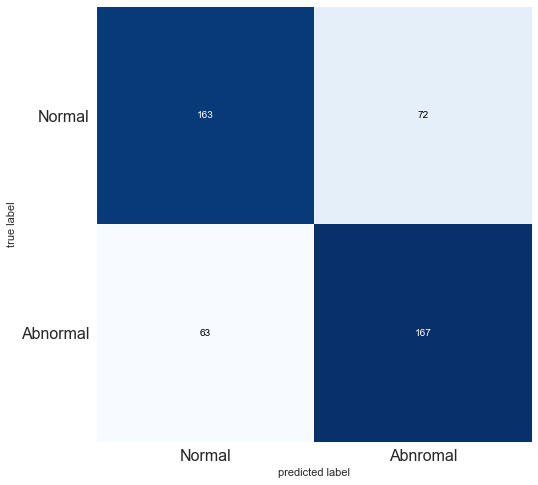

Precison of MURA for Abnormal:0.70
Recall of MURA for Abnormal:0.73
Fmeasure of MURA for Abnormal:0.71
Kappa of MURA for Abnormal:0.42
Predicted: Abnormal  [0.6369459]


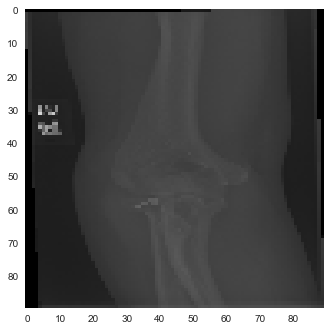

Predicted: Abnormal  [0.6685181]


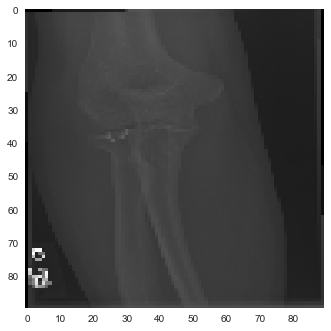

predicted: Normal [0.8262478]


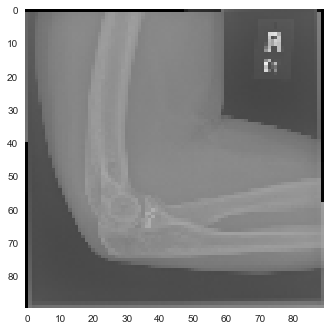

predicted: Normal [0.7394229]


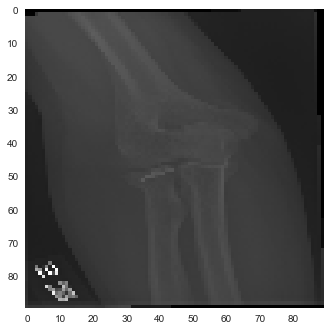

Predicted: Abnormal  [0.5567401]


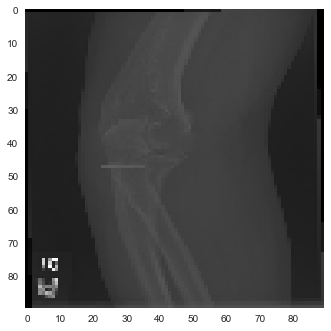

predicted: Normal [0.7499718]


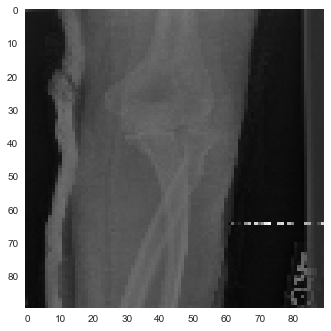

Predicted: Abnormal  [0.45294043]


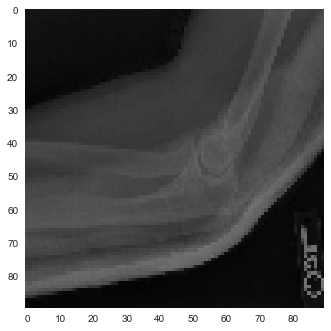

predicted: Normal [0.78847635]


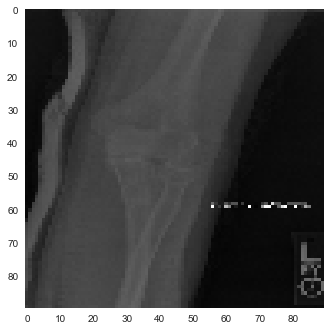

Predicted: Abnormal  [0.5900892]


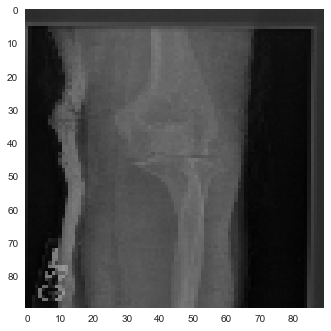

Predicted: Abnormal  [0.63600975]


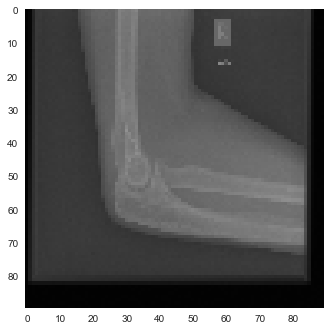

Predicted: Abnormal  [0.5991737]


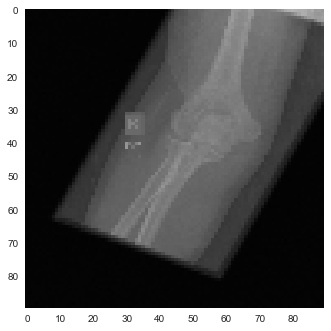

Predicted: Abnormal  [0.3543973]


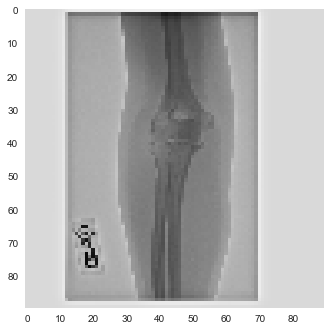

Predicted: Abnormal  [0.3610295]


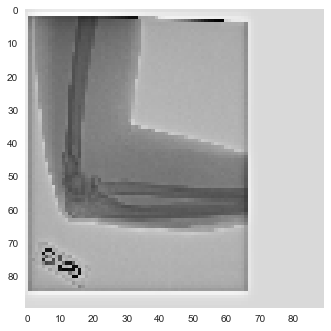

Predicted: Abnormal  [0.2705057]


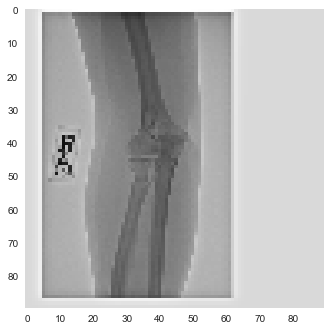

Predicted: Abnormal  [0.7019559]


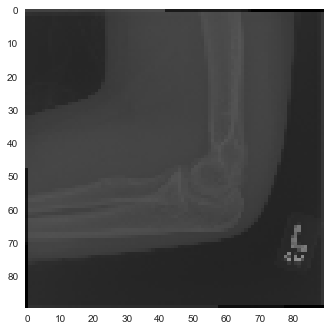

Predicted: Abnormal  [0.395581]


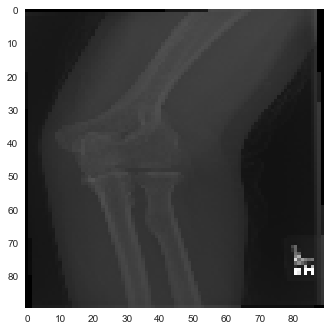

Predicted: Abnormal  [0.6073255]


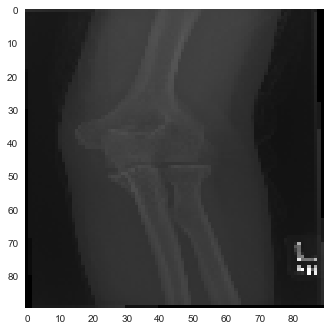

Predicted: Abnormal  [0.39175546]


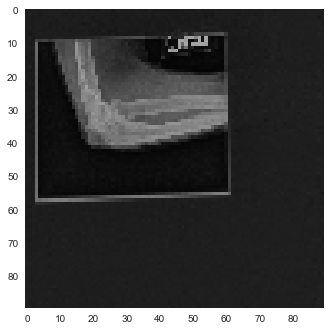

Predicted: Abnormal  [0.35242054]


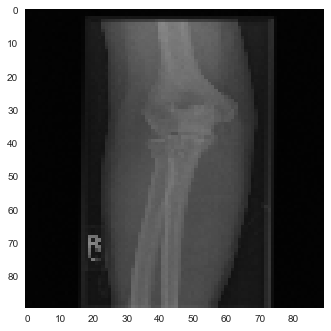

Predicted: Abnormal  [0.2992319]


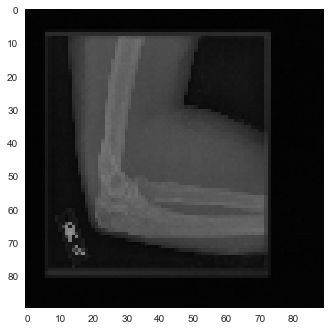

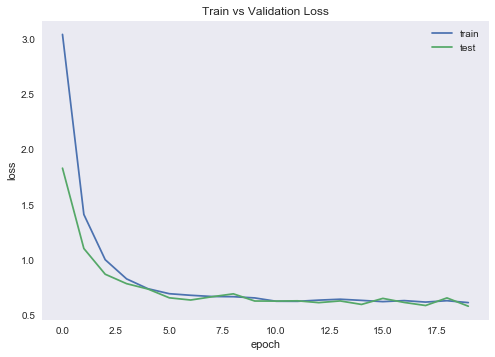

In [35]:
test_Elbow_inception,kappa_inception_elbow=plotResults(validation_X_ELBOW,validation_y_ELBOW,inception_model)
plotingModel(history_inception_ELBOW)


In [36]:
train_X_FOREARM, train_y_FOREARM,validation_X_FOREARM, validation_y_FOREARM = load_data("FOREARM")
train_X_FOREARM = train_X_FOREARM.reshape(-1, 90, 90, 3) / 255.0
validation_X_FOREARM = validation_X_FOREARM.reshape(-1, 90, 90, 3) / 255.0
history_inception_FORARM = inception_model.fit(train_X_FOREARM, train_y_FOREARM, epochs=20, batch_size=64, validation_data=(validation_X_FOREARM, validation_y_FOREARM))



Train on 1825 samples, validate on 301 samples
Epoch 1/20
1825/1825 [==============================] - 31s 17ms/sample - loss: 0.6594 - accuracy: 0.6625 - val_loss: 0.7294 - val_accuracy: 0.5581
Epoch 2/20
1825/1825 [==============================] - 32s 17ms/sample - loss: 0.6087 - accuracy: 0.7156 - val_loss: 0.6580 - val_accuracy: 0.6711
Epoch 3/20
1825/1825 [==============================] - 34s 19ms/sample - loss: 0.5813 - accuracy: 0.7408 - val_loss: 0.7251 - val_accuracy: 0.5980
Epoch 4/20
1825/1825 [==============================] - 35s 19ms/sample - loss: 0.5823 - accuracy: 0.7425 - val_loss: 0.7348 - val_accuracy: 0.6146
Epoch 5/20
1825/1825 [==============================] - 34s 19ms/sample - loss: 0.5666 - accuracy: 0.7468 - val_loss: 0.6292 - val_accuracy: 0.6777
Epoch 6/20
1825/1825 [==============================] - 37s 20ms/sample - loss: 0.5734 - accuracy: 0.7540 - val_loss: 0.6376 - val_accuracy: 0.6811
Epoch 7/20
1825/1825 [==============================] - 36s 19ms/

301/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss on test set:  0.733390196316266
Accuracy on test set:  0.6511628


<Figure size 576x396 with 0 Axes>

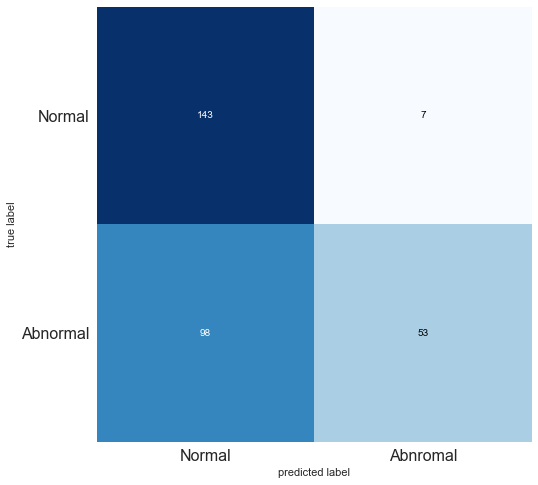

Precison of MURA for Abnormal:0.88
Recall of MURA for Abnormal:0.35
Fmeasure of MURA for Abnormal:0.50
Kappa of MURA for Abnormal:0.30
Predicted: Abnormal  [0.08542639]


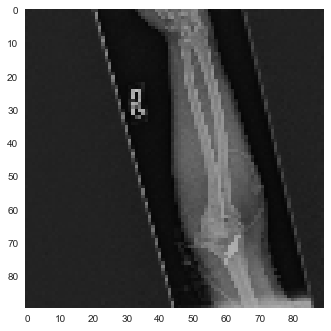

Predicted: Abnormal  [0.19785422]


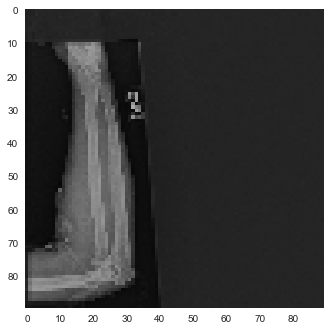

Predicted: Abnormal  [0.14999151]


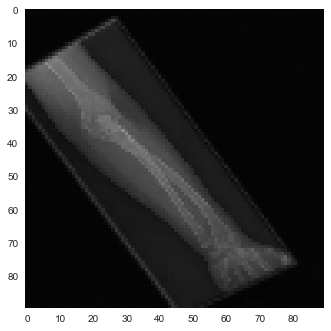

Predicted: Abnormal  [0.06454232]


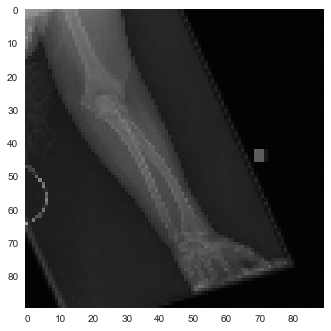

Predicted: Abnormal  [0.22034842]


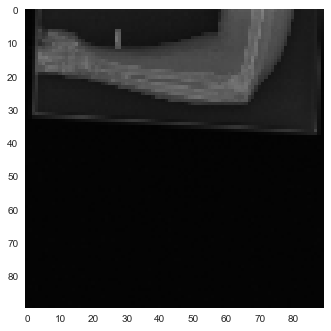

Predicted: Abnormal  [0.2820155]


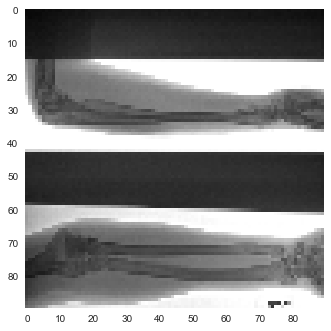

Predicted: Abnormal  [0.30791634]


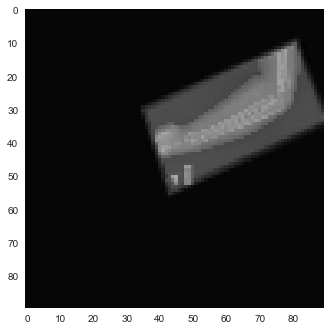

Predicted: Abnormal  [0.330021]


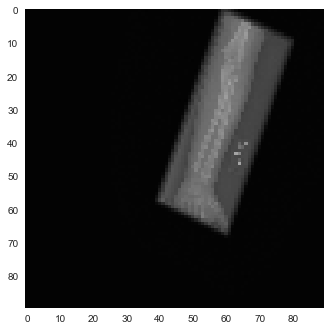

Predicted: Abnormal  [0.12418512]


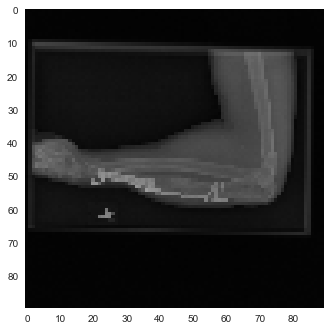

predicted: Normal [0.84968996]


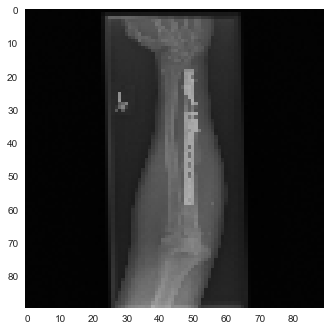

Predicted: Abnormal  [0.16552934]


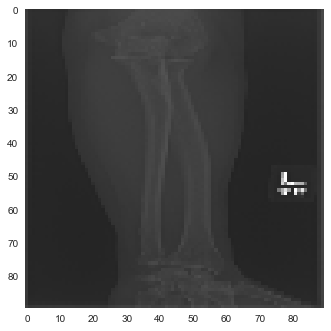

Predicted: Abnormal  [0.17250192]


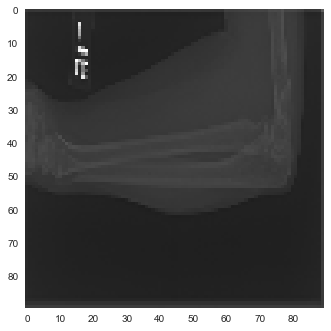

Predicted: Abnormal  [0.19000238]


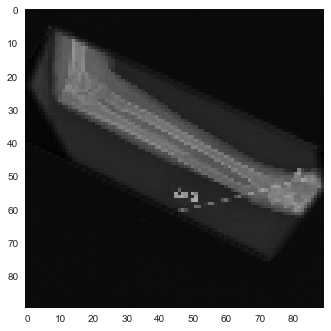

Predicted: Abnormal  [0.30410504]


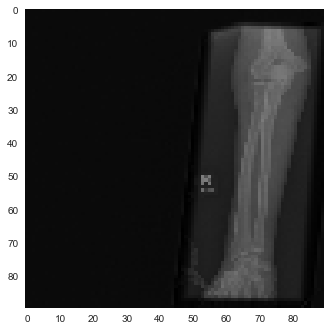

Predicted: Abnormal  [0.28311807]


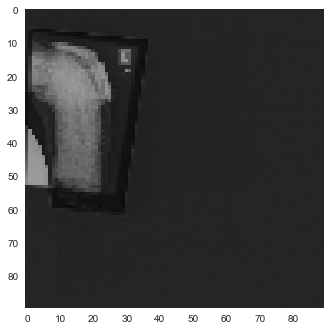

Predicted: Abnormal  [0.60423183]


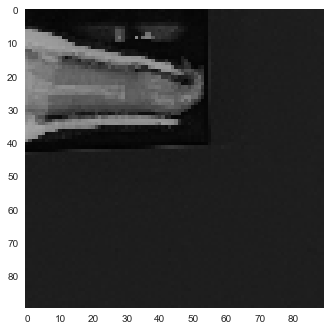

Predicted: Abnormal  [0.09254613]


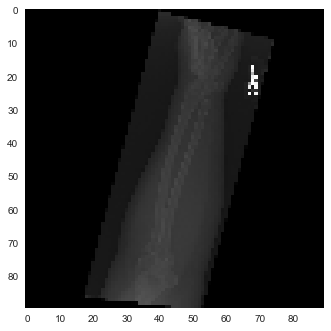

Predicted: Abnormal  [0.09241655]


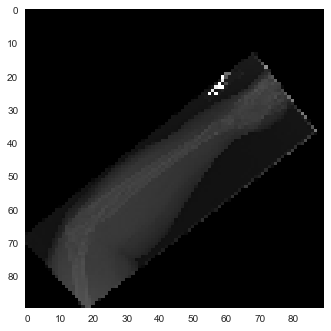

Predicted: Abnormal  [0.12146652]


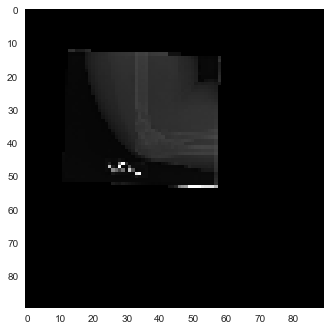

Predicted: Abnormal  [0.6423401]


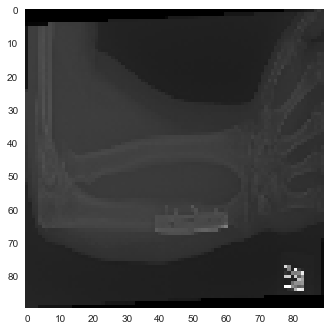

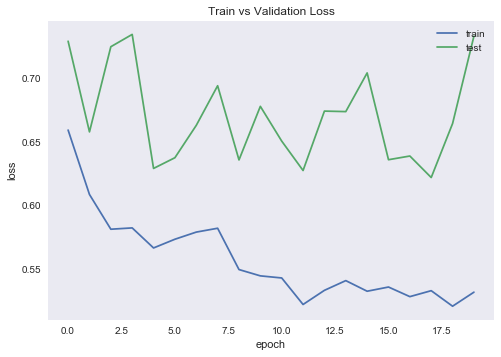

In [37]:
test_Arm_inception,kappa_inception_Arm=plotResults(validation_X_FOREARM, validation_y_FOREARM,inception_model)
plotingModel(history_inception_FORARM)

In [38]:
train_X_HAND, train_y_HAND,validation_X_HAND, validation_y_HAND = load_data("HAND")
train_X_HAND = train_X_HAND.reshape(-1, 90, 90, 3) / 255.0
validation_X_HAND = validation_X_HAND.reshape(-1, 90, 90, 3) / 255.0
history_inception_HAND = inception_model.fit(train_X_HAND, train_y_HAND, epochs=20, batch_size=64, validation_data=(validation_X_HAND, validation_y_HAND))



Train on 5543 samples, validate on 460 samples
Epoch 1/20
5543/5543 [==============================] - 91s 16ms/sample - loss: 0.6322 - accuracy: 0.7307 - val_loss: 0.6879 - val_accuracy: 0.5891
Epoch 2/20
5543/5543 [==============================] - 88s 16ms/sample - loss: 0.5989 - accuracy: 0.7328 - val_loss: 0.6857 - val_accuracy: 0.5935
Epoch 3/20
5543/5543 [==============================] - 145s 26ms/sample - loss: 0.5948 - accuracy: 0.7390 - val_loss: 0.6562 - val_accuracy: 0.6239
Epoch 4/20
5543/5543 [==============================] - 138s 25ms/sample - loss: 0.5870 - accuracy: 0.7346 - val_loss: 0.6620 - val_accuracy: 0.6130
Epoch 6/20
5543/5543 [==============================] - 143s 26ms/sample - loss: 0.5750 - accuracy: 0.7426 - val_loss: 0.6694 - val_accuracy: 0.6043
Epoch 7/20
5543/5543 [==============================] - 140s 25ms/sample - loss: 0.5769 - accuracy: 0.7408 - val_loss: 0.7100 - val_accuracy: 0.6000
Epoch 8/20
5543/5543 [==============================] - 146s 

460/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss on test set:  0.6779725901458574
Accuracy on test set:  0.6065217


<Figure size 576x396 with 0 Axes>

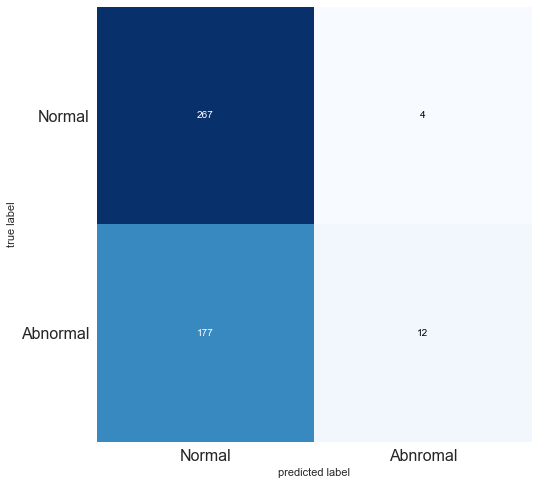

Precison of MURA for Abnormal:0.75
Recall of MURA for Abnormal:0.06
Fmeasure of MURA for Abnormal:0.12
Kappa of MURA for Abnormal:0.06
Predicted: Abnormal  [0.31014922]


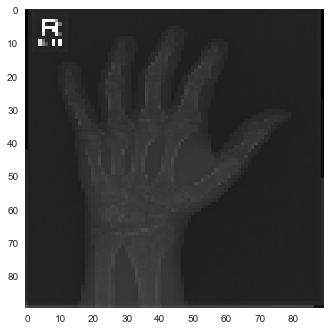

Predicted: Abnormal  [0.28768653]


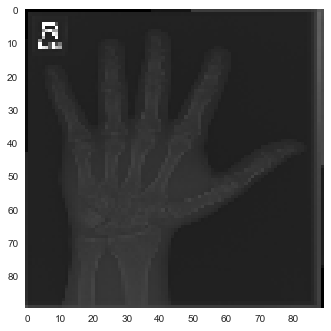

Predicted: Abnormal  [0.23845467]


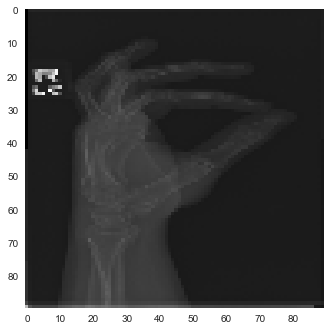

Predicted: Abnormal  [0.43485594]


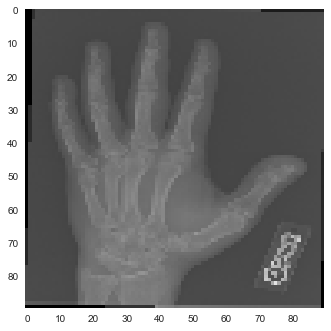

Predicted: Abnormal  [0.26939085]


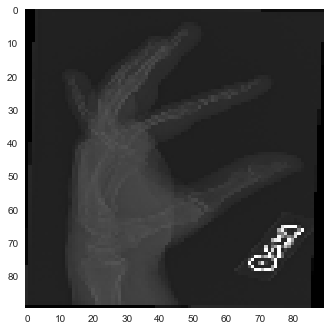

Predicted: Abnormal  [0.29555237]


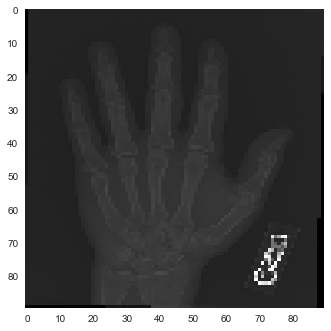

Predicted: Abnormal  [0.21565536]


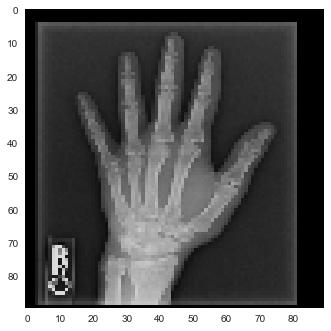

Predicted: Abnormal  [0.19552621]


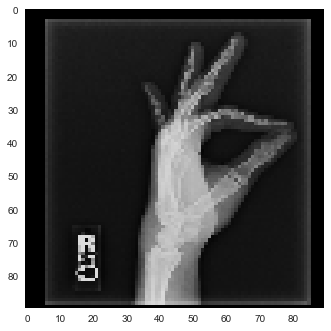

Predicted: Abnormal  [0.21160477]


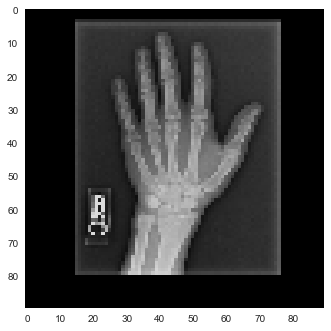

Predicted: Abnormal  [0.4141047]


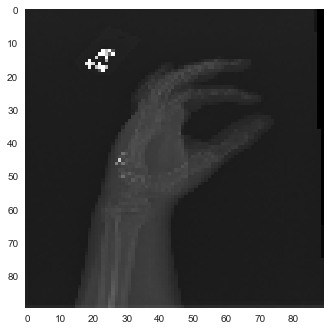

Predicted: Abnormal  [0.24523476]


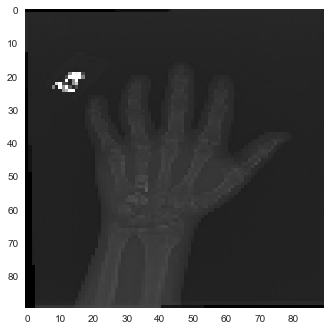

Predicted: Abnormal  [0.392647]


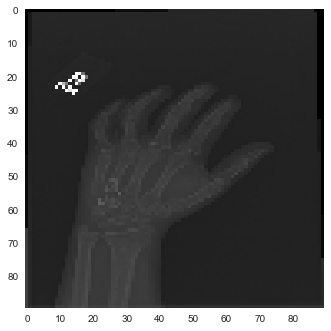

Predicted: Abnormal  [0.24125844]


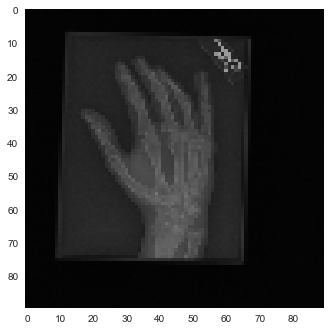

Predicted: Abnormal  [0.21071497]


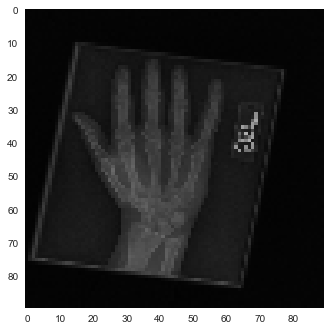

Predicted: Abnormal  [0.26512086]


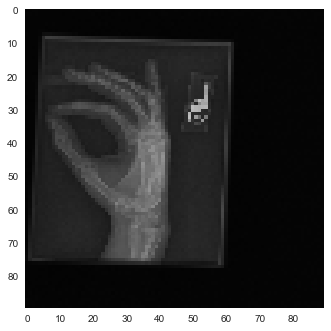

Predicted: Abnormal  [0.26644158]


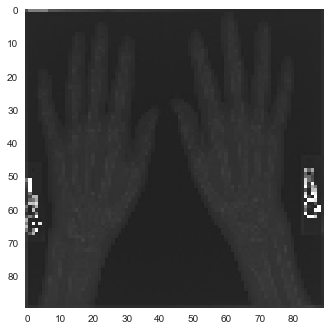

Predicted: Abnormal  [0.17219281]


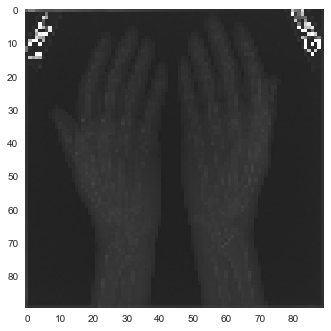

Predicted: Abnormal  [0.23188493]


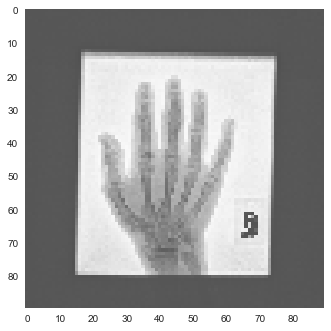

Predicted: Abnormal  [0.2529174]


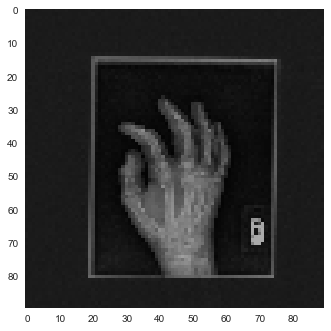

Predicted: Abnormal  [0.26179528]


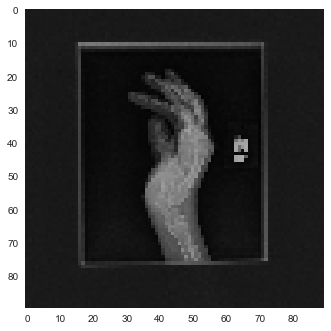

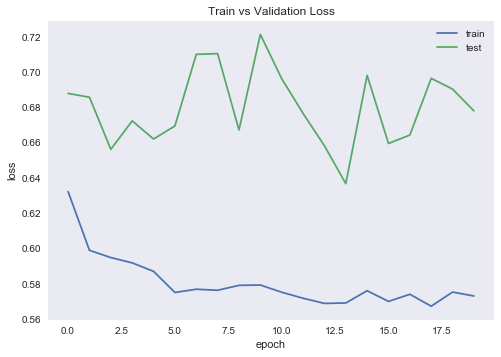

In [39]:
test_HAND_inception,kappa_inception_hand=plotResults(validation_X_HAND, validation_y_HAND,inception_model)
plotingModel(history_inception_HAND)

In [40]:
train_X_HUMERUS, train_y_HUMERUS,validation_X_HUMERUS, validation_y_HUMERUS = load_data("HUMERUS")
train_X_HUMERUS = train_X_HUMERUS.reshape(-1, 90, 90, 3) / 255.0
validation_X_HUMERUS = validation_X_HUMERUS.reshape(-1, 90, 90, 3) / 255.0
history_inception_HUMERUS =  inception_model.fit(train_X_HUMERUS, train_y_HUMERUS, epochs=20, batch_size=64, validation_data=(validation_X_HUMERUS, validation_y_HUMERUS))



Train on 1272 samples, validate on 288 samples
Epoch 1/20
1272/1272 [==============================] - 38s 30ms/sample - loss: 0.7306 - accuracy: 0.5542 - val_loss: 0.6376 - val_accuracy: 0.6632
Epoch 2/20
1272/1272 [==============================] - 35s 28ms/sample - loss: 0.6958 - accuracy: 0.5802 - val_loss: 0.6224 - val_accuracy: 0.7083
Epoch 3/20
1272/1272 [==============================] - 38s 30ms/sample - loss: 0.6648 - accuracy: 0.6281 - val_loss: 0.6063 - val_accuracy: 0.7118
Epoch 4/20
1272/1272 [==============================] - 29s 23ms/sample - loss: 0.6485 - accuracy: 0.6533 - val_loss: 0.6097 - val_accuracy: 0.7396
Epoch 5/20
1272/1272 [==============================] - 25s 19ms/sample - loss: 0.6429 - accuracy: 0.6690 - val_loss: 0.6129 - val_accuracy: 0.7465
Epoch 6/20
1272/1272 [==============================] - 24s 19ms/sample - loss: 0.6358 - accuracy: 0.6690 - val_loss: 0.6115 - val_accuracy: 0.7535
Epoch 7/20
1272/1272 [==============================] - 24s 19ms/

288/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss on test set:  0.5433916805518998
Accuracy on test set:  0.7638889


<Figure size 576x396 with 0 Axes>

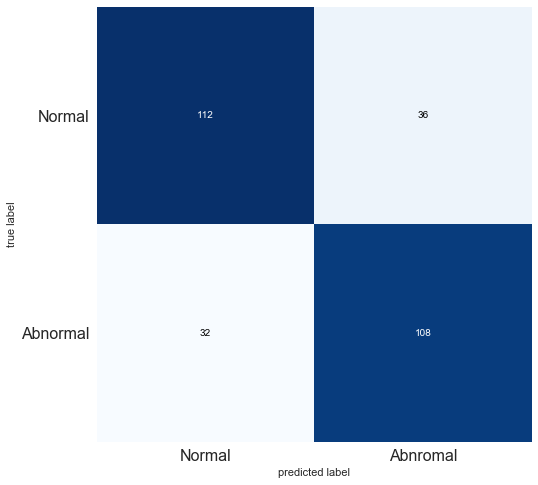

Precison of MURA for Abnormal:0.75
Recall of MURA for Abnormal:0.77
Fmeasure of MURA for Abnormal:0.76
Kappa of MURA for Abnormal:0.53
Predicted: Abnormal  [0.7426362]


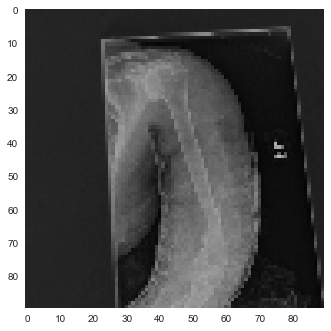

Predicted: Abnormal  [0.5224563]


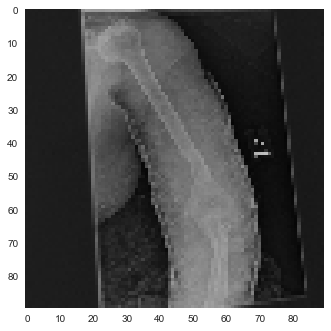

Predicted: Abnormal  [0.39949343]


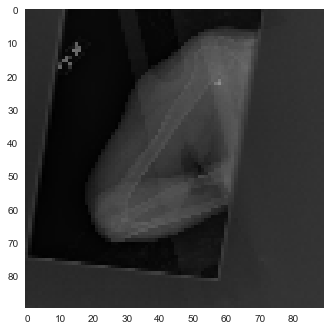

Predicted: Abnormal  [0.40891808]


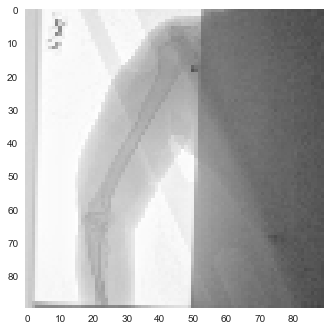

Predicted: Abnormal  [0.73007274]


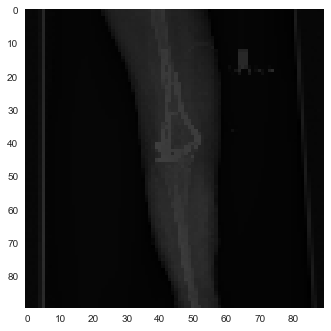

Predicted: Abnormal  [0.4846801]


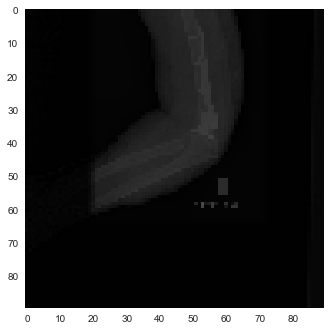

Predicted: Abnormal  [0.4330061]


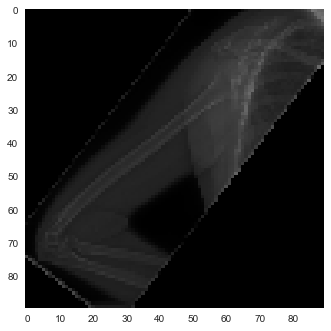

Predicted: Abnormal  [0.5164656]


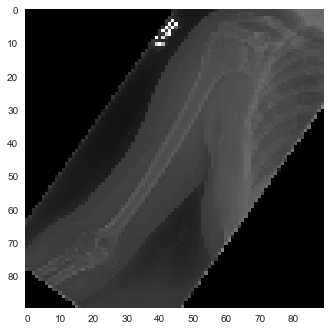

Predicted: Abnormal  [0.30730242]


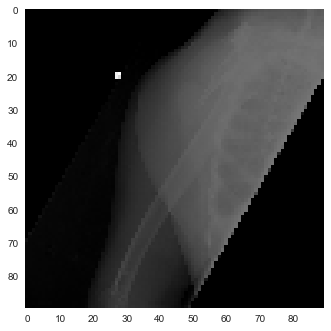

Predicted: Abnormal  [0.24981692]


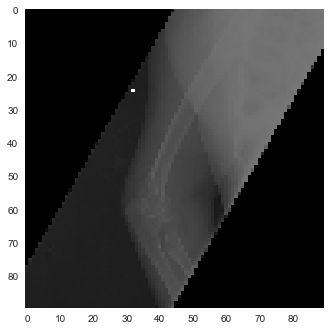

Predicted: Abnormal  [0.38164434]


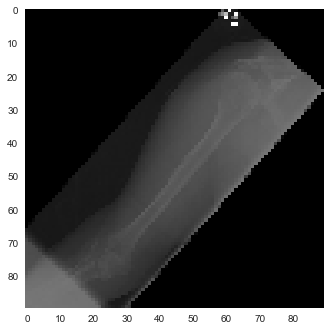

Predicted: Abnormal  [0.49740884]


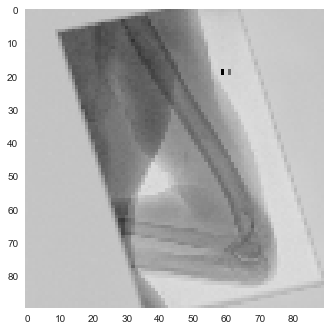

Predicted: Abnormal  [0.21548173]


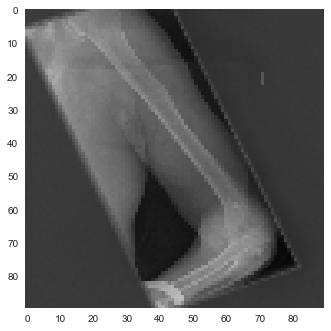

Predicted: Abnormal  [0.7029616]


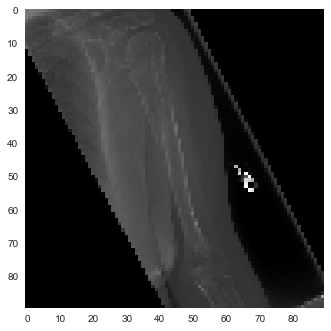

predicted: Normal [0.79551375]


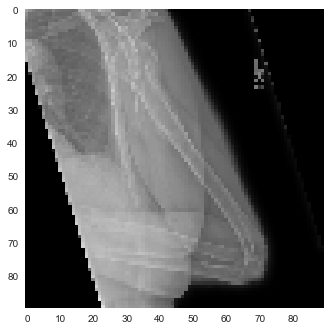

Predicted: Abnormal  [0.74582314]


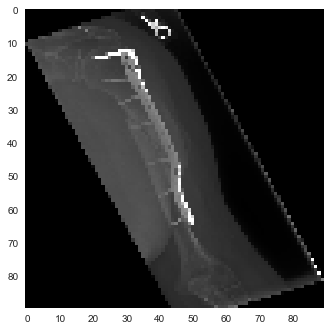

predicted: Normal [0.77459884]


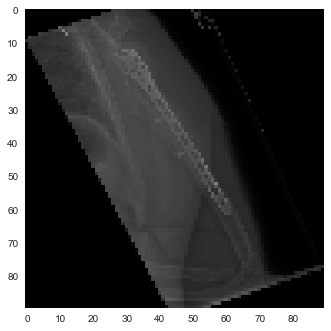

Predicted: Abnormal  [0.7415132]


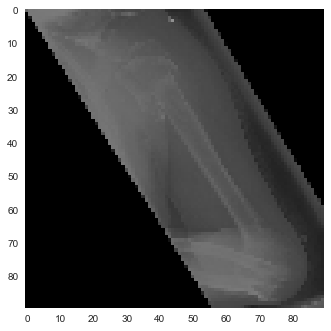

Predicted: Abnormal  [0.3933851]


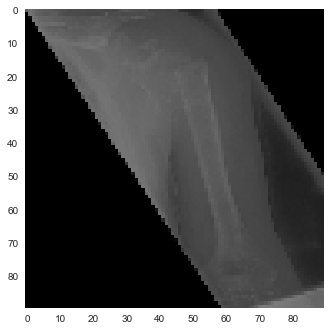

Predicted: Abnormal  [0.73297566]


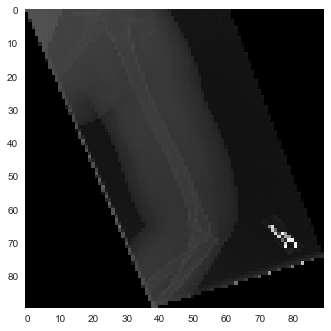

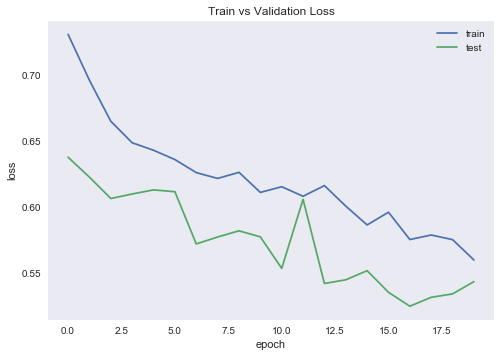

In [41]:
test_HUMERUS_inception,kappa_inception_humerus=plotResults(validation_X_HUMERUS, validation_y_HUMERUS,inception_model)
plotingModel(history_inception_HUMERUS)

In [42]:
train_X_WRIST, train_y_WRIST,validation_X_WRIST, validation_y_WRIST = load_data("WRIST")
train_X_WRIST = train_X_WRIST.reshape(-1, 90, 90, 3) / 255.0
validation_X_WRIST = validation_X_WRIST.reshape(-1, 90, 90, 3) / 255.0
history_inception_WRIST = inception_model.fit(train_X_WRIST, train_y_WRIST, epochs=20, batch_size=64, validation_data=(validation_X_WRIST, validation_y_WRIST))



Train on 9752 samples, validate on 659 samples
Epoch 1/20
9752/9752 [==============================] - 206s 21ms/sample - loss: 0.6635 - accuracy: 0.6440 - val_loss: 0.6381 - val_accuracy: 0.6662
Epoch 2/20
9752/9752 [==============================] - 187s 19ms/sample - loss: 0.6422 - accuracy: 0.6637 - val_loss: 0.6251 - val_accuracy: 0.6783
Epoch 3/20
9752/9752 [==============================] - 200s 20ms/sample - loss: 0.6269 - accuracy: 0.6741 - val_loss: 0.6239 - val_accuracy: 0.6707
Epoch 4/20
9752/9752 [==============================] - 174s 18ms/sample - loss: 0.6174 - accuracy: 0.6821 - val_loss: 0.6254 - val_accuracy: 0.6571
Epoch 5/20
9752/9752 [==============================] - 197s 20ms/sample - loss: 0.6180 - accuracy: 0.6828 - val_loss: 0.6274 - val_accuracy: 0.6829
Epoch 6/20
9752/9752 [==============================] - 217s 22ms/sample - loss: 0.6173 - accuracy: 0.6777 - val_loss: 0.5992 - val_accuracy: 0.7026
Epoch 7/20
9752/9752 [==============================] - 225

659/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss on test set:  0.6156575950215908
Accuracy on test set:  0.67223066


<Figure size 576x396 with 0 Axes>

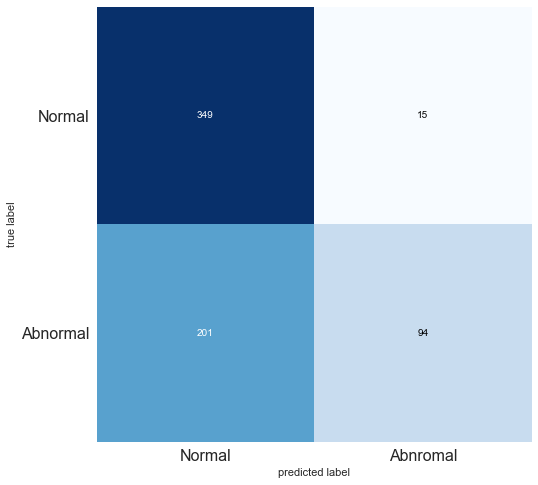

Precison of MURA for Abnormal:0.86
Recall of MURA for Abnormal:0.32
Fmeasure of MURA for Abnormal:0.47
Kappa of MURA for Abnormal:0.30
Predicted: Abnormal  [0.4424415]


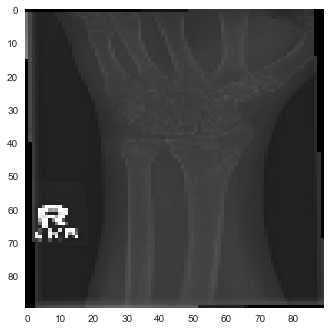

Predicted: Abnormal  [0.4221019]


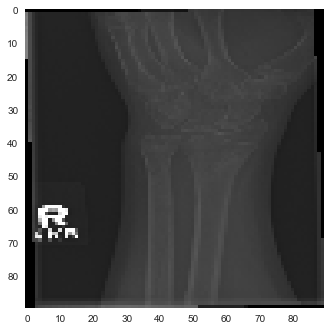

Predicted: Abnormal  [0.47851607]


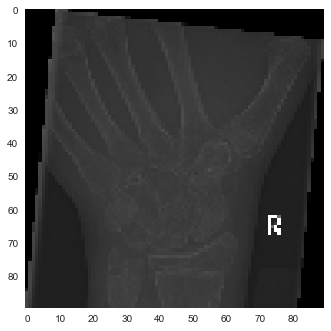

Predicted: Abnormal  [0.43030512]


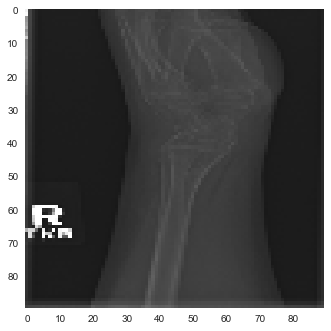

Predicted: Abnormal  [0.43030512]


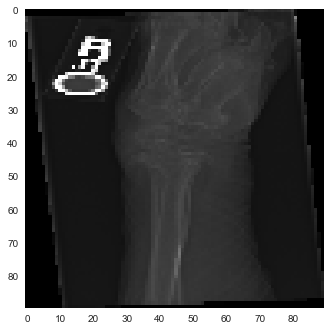

Predicted: Abnormal  [0.5424324]


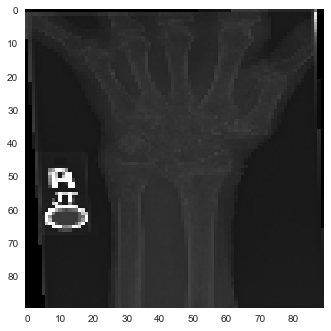

Predicted: Abnormal  [0.6378758]


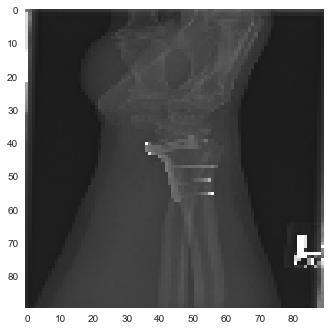

Predicted: Abnormal  [0.3656367]


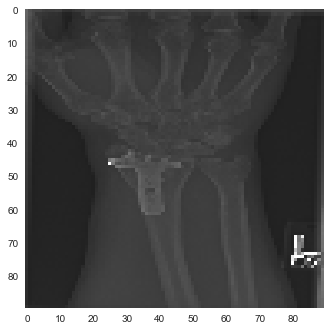

Predicted: Abnormal  [0.40926838]


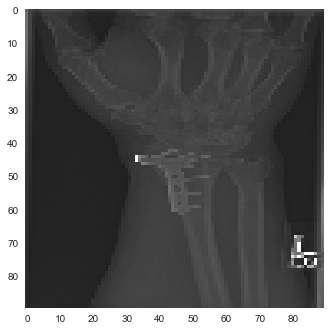

Predicted: Abnormal  [0.26368693]


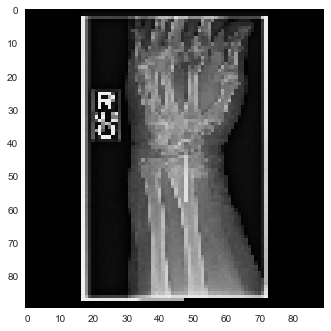

Predicted: Abnormal  [0.24907619]


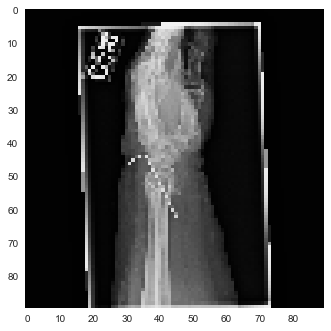

Predicted: Abnormal  [0.31469712]


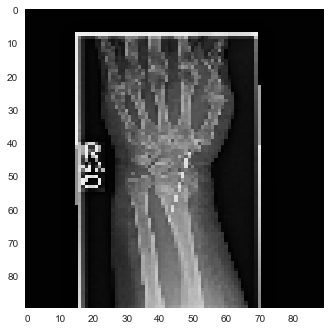

Predicted: Abnormal  [0.13010645]


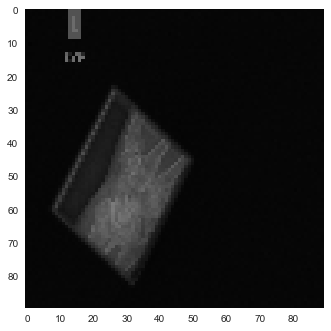

Predicted: Abnormal  [0.2846895]


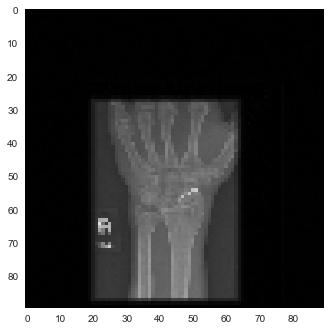

Predicted: Abnormal  [0.24053815]


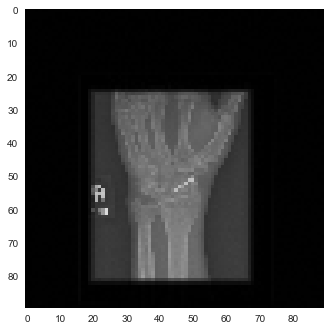

Predicted: Abnormal  [0.37014818]


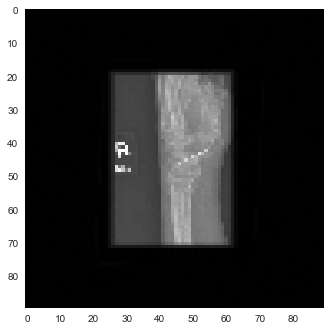

Predicted: Abnormal  [0.27918893]


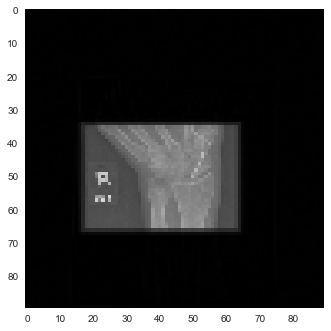

Predicted: Abnormal  [0.43030512]


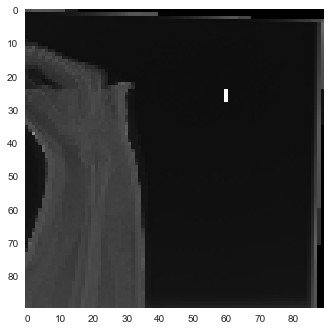

Predicted: Abnormal  [0.309328]


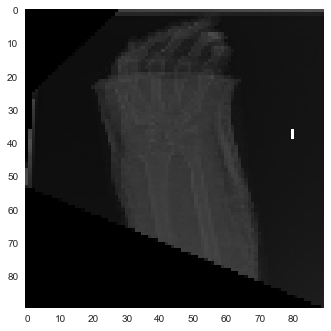

Predicted: Abnormal  [0.46854654]


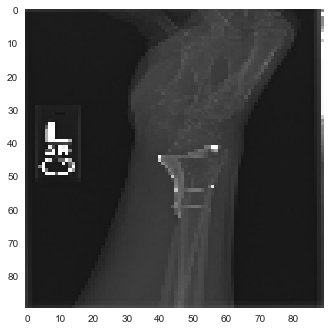

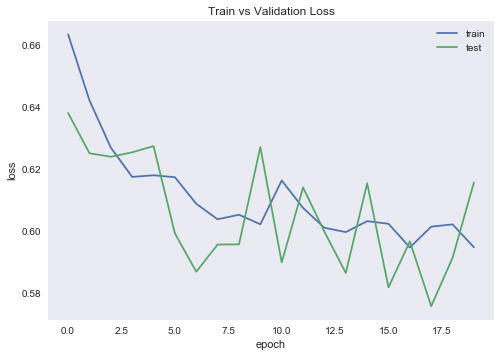

In [43]:
test_WRIST_inception,kappa_inception_wrist=plotResults(validation_X_WRIST, validation_y_WRIST,inception_model)
plotingModel(history_inception_WRIST)

In [ ]:
train_X_SHOULDER, train_y_SHOULDER,validation_X_SHOULDER, validation_y_SHOULDER = load_data("SHOULDER")
train_X_SHOULDER = train_X_SHOULDER.reshape(-1, 90, 90, 3) / 255.0
validation_X_SHOULDER = validation_X_SHOULDER.reshape(-1, 90, 90, 3) / 255.0
history_inception_SHOULDER= inception_model.fit(train_X_SHOULDER, train_y_SHOULDER, epochs=20, batch_size=64, validation_data=(validation_X_SHOULDER, validation_y_SHOULDER))



In [ ]:
test_SHOULDER_inception,kappa_inception_shoulder=plotResults(validation_X_SHOULDER, validation_y_SHOULDER,inception_model)
plotingModel(history_inception_SHOULDER)

In [ ]:
train_X_FINGER, train_y_FINGER,validation_X_FINGER, validation_y_FINGER = load_data("FINGER")
train_X_FINGER = train_X_FINGER.reshape(-1, 90, 90, 3) / 255.0
validation_X_FINGER = validation_X_FINGER.reshape(-1, 90, 90, 3) / 255.0
history_inception_FINGER= inception_model.fit(train_X_FINGER, train_y_FINGER, epochs=20, batch_size=64, validation_data=(validation_X_FINGER, validation_y_FINGER))



In [ ]:
test_FINGER_inception,kappa_inception_finger=plotResults(validation_X_FINGER, validation_y_FINGER,inception_model)
plotingModel(history_inception_FINGER)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bodyPart = ['ELBOW', 'FINGER','FOREARM','HAND', 'HUMERUS', 'SHOULDER', 'WRIST']
test_acc = [test_Elbow_inception,test_FINGER_inception,test_Arm_inception,test_HAND_inception,test_HUMERUS_inception,test_SHOULDER_inception,test_WRIST_inception]
ax.bar(bodyPart,test_acc)
plt.title("Inception Body Parts Accuracies")
plt.ylabel('Body Part')
plt.xlabel('Accuracy')

plt.show()

In [ ]:
test_acc = [test_accElbow_mob,test_accFinger_mob,test_accArm_mob,test_accHand_mob,test_accHmerus_mob,test_accShoulder_mob,test_accWrist_mob]
import numpy
numpy.savetxt("inceptionV1_accuracy.csv", test_acc, delimiter=",")
